In [1]:
from uk_covid19 import Cov19API
import json
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as wdg
%matplotlib inline


In [2]:
filters = [
    'areaType=overview' # note each metric-value pair is inside one string
]

In [3]:
structure = {
    "date": "date",
    "cases": "newCasesByPublishDate",
    "hospital": "newAdmissions",
    "deaths": "cumDeaths28DaysByDeathDateRate"    
}

Get Comparison between planned PCR Capacity and new Tests

In [4]:
filters_pcr_comp = [
    'areaType=overview' # note each metric-value pair is inside one string
]

In [5]:
structure_pcr_comp = {
    "date": "date",
    "newPCR": "newPCRTestsByPublishDate",
    "plannedPCR": "plannedPCRCapacityByPublishDate",  
}

In [6]:
api_pcr_comp = Cov19API(filters=filters_pcr_comp, structure=structure_pcr_comp)

In [7]:
pcr_comp_data = api_pcr_comp.get_json()
print(pcr_comp_data)

{'data': [{'date': '2022-11-17', 'newPCR': None, 'plannedPCR': 273828}, {'date': '2022-11-16', 'newPCR': None, 'plannedPCR': 273828}, {'date': '2022-11-15', 'newPCR': None, 'plannedPCR': 283828}, {'date': '2022-11-14', 'newPCR': None, 'plannedPCR': 283828}, {'date': '2022-11-13', 'newPCR': None, 'plannedPCR': 283828}, {'date': '2022-11-12', 'newPCR': None, 'plannedPCR': 283828}, {'date': '2022-11-11', 'newPCR': None, 'plannedPCR': 283828}, {'date': '2022-11-10', 'newPCR': None, 'plannedPCR': 284284}, {'date': '2022-11-09', 'newPCR': None, 'plannedPCR': 284284}, {'date': '2022-11-08', 'newPCR': None, 'plannedPCR': 284284}, {'date': '2022-11-07', 'newPCR': None, 'plannedPCR': 284284}, {'date': '2022-11-06', 'newPCR': None, 'plannedPCR': 298284}, {'date': '2022-11-05', 'newPCR': None, 'plannedPCR': 298284}, {'date': '2022-11-04', 'newPCR': None, 'plannedPCR': 298284}, {'date': '2022-11-03', 'newPCR': None, 'plannedPCR': 298297}, {'date': '2022-11-02', 'newPCR': None, 'plannedPCR': 298297}

In [8]:
with open("pcr_comp.json", "wt") as OUTF:
    json.dump(pcr_comp_data, OUTF)

<AxesSubplot:>

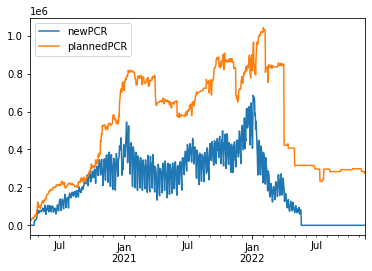

In [9]:
#plotting

with open("pcr_comp.json", "rt") as INFILE:
    pcr_data = json.load(INFILE)

# gettin the data into a list
pcr_data_list = pcr_data["data"]
#print(pcr_data_list)

#getting the dates
pcr_dates = [dic["date"] for dic in pcr_data_list]

pcr_dates.sort()
#print(pcr_dates)


#function to get the panda of a datestring
def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")


#getting the start and end dates
pcr_startdate = parse_date(pcr_dates[0])
pcr_enddate = parse_date(pcr_dates[-1])
#print (startdate, ' to ', enddate)

# getting the index

pcr_index = pd.date_range(pcr_startdate, pcr_enddate, freq='D')

# getting the data into a dataframe

pcr_comp_df = pd.DataFrame(index=pcr_index, columns=["newPCR", "plannedPCR"])
#print(pcr_comp_df)

# filling the the dataframe

for entry in pcr_data_list:

    date = parse_date(entry["date"])

    for column in ["newPCR", "plannedPCR"]: # learning: make sure you have the same column name for the data frame and the list / json file

        if pd.isna(pcr_comp_df.loc[date, column]):

            value = float(entry[column]) if entry[column] !=None else 0.0

            pcr_comp_df.loc[date, column] = value

pcr_comp_df.fillna(0.0, inplace=True)

#print(pcr_comp_df)


pcr_comp_df.plot()

In [10]:
# making this interactive

def accessAPI(button):

    # api call here
    api_pcr_comp = Cov19API(filters=filters_pcr_comp, structure=structure_pcr_comp) # do I also have to trigger the update of the files, etc from here? And the data list?
    pcr_comp_data = api_pcr_comp.get_json()   # as to above, would refreshing this overwrite the file (if the trigger file update) or could it create the bug of adding the data on top

    apibutton.icon="check"
    apibutton.disabled=True


apibutton=wdg.Button(
    description='Refresh data',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to download current Public Health England data',
    icon='download' # (FontAwesome names without the `fa-` prefix)
)

# register the callback function with the button
apibutton.on_click(accessAPI)


# display the widgets
display(apibutton)

Button(description='Refresh data', icon='download', style=ButtonStyle(), tooltip='Click to download current Pu…

In [11]:
pcr_cols=wdg.SelectMultiple(
    options=['newPCR', 'plannedPCR'], # could add "delta" later
    value=['newPCR', 'plannedPCR'], # initial value
    rows=2, # rows of the selection box
    description='Categories',
    disabled=False
)


def pcr_comp_graph(graphcolumns):
    # our callback function.
    ncols=len(graphcolumns)
    if ncols>0:
        pcr_comp_df.plot(kind='line', y=list(graphcolumns)) # graphcolumns is a tuple - we need a list
        plt.show() # important - graphs won't update properly if this is missing
    else:
        # if the user has not selected any column, print a message instead
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")
    
# keep calling age_graph(graphcolumns=value_of_agecols); capture output in widget output    
output=wdg.interactive_output(pcr_comp_graph, {'graphcolumns': pcr_cols})

display(pcr_cols, output)

SelectMultiple(description='Categories', index=(0, 1), options=('newPCR', 'plannedPCR'), rows=2, value=('newPC…

Output()